# Seoul Bike Sharing Demand Dataset
## Regression Problem

Objective:
To explore both simple linear regression and multiple linear regression. Neural network perdiction performance to be compared with that of the linear regression model.

Source:
Seoul Bike Sharing Demand [Dataset]. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy  # to duplicate dataframe

import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
# Dataset Cols

dataset_cols = ['bike-count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']


In [3]:
# Read CSV and Drop date, holiday and seasons cols
df = pd.read_csv('SeoulBikeData.csv').drop(['Date', 'Holiday', 'Seasons'], axis=1)

In [4]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10 m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [5]:
df.columns = dataset_cols

In [6]:
# df.head()

In [7]:
# Converting categorical data to numerica data for target variable 'Funcioning Day'
df['functional'] = (df['functional']=='Yes').astype(int)


In [8]:
df.head()

,bike-count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [9]:
# dropping hour col
df = df[df['hour'] == 12]
#

In [10]:
df.head()

,bike-count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [11]:
df = df.drop(['hour'], axis = 1)

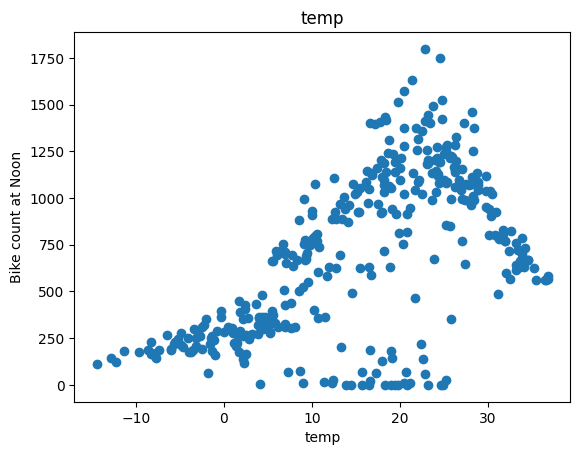

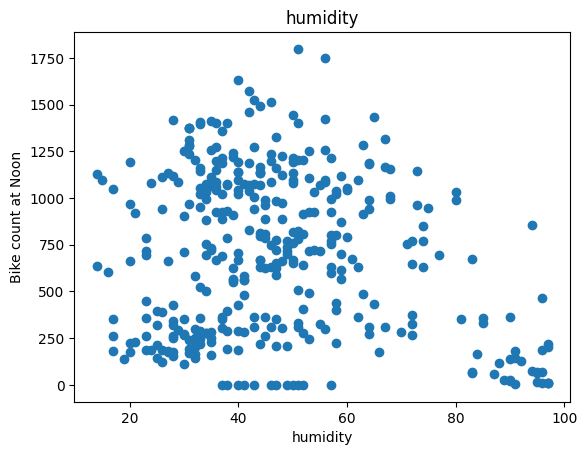

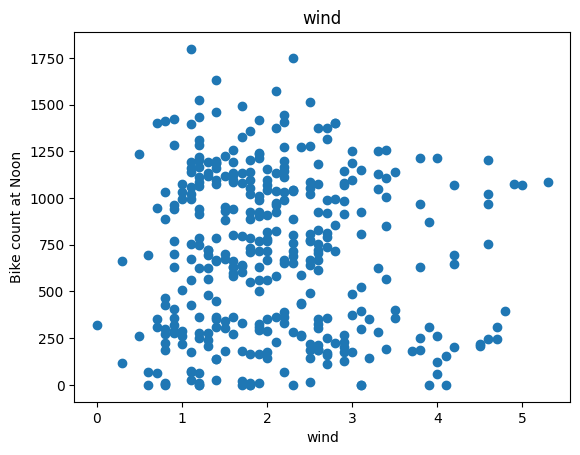

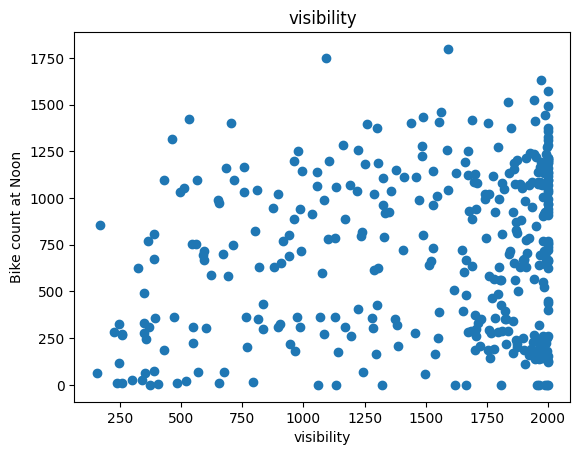

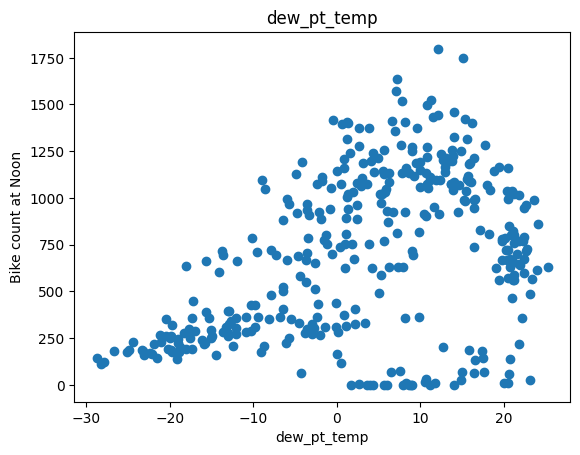

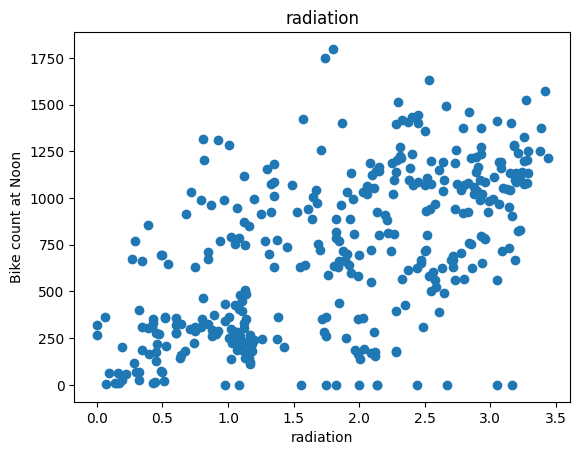

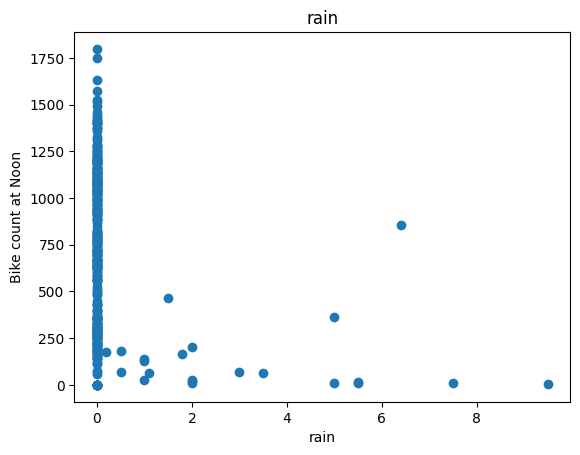

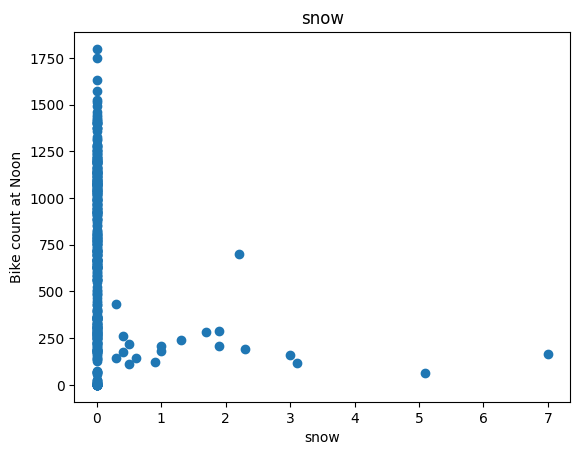

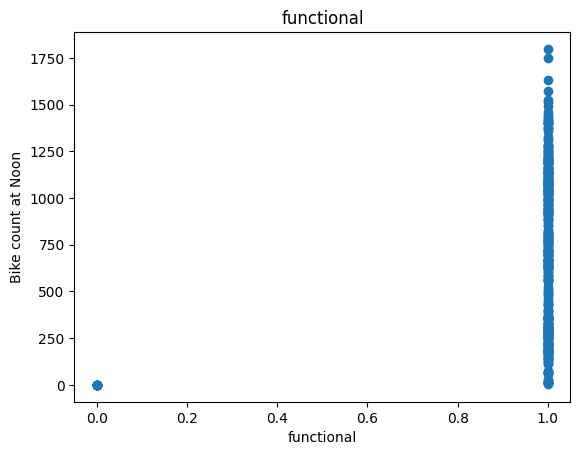

In [12]:
# Plot the features

for label in df.columns[1:]:
    plt.scatter(df[label], df['bike-count'])
    plt.title(label)
    plt.ylabel("Bike count at Noon")
    plt.xlabel(label)
    plt.show()

In [13]:
df = df.drop(['wind', 'visibility', 'functional'], axis=1)

## Train/valid/test dataset

In [14]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!= y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))

    return data, X, y

In [16]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike-count', x_labels=['temp']) 
_, X_valid_temp, y_valid_temp = get_xy(valid, 'bike-count', x_labels=['temp']) 
_, X_test_temp, y_test_temp = get_xy(test, 'bike-count', x_labels=['temp']) 

In [17]:
#X_train_temp

In [18]:
# Creating a regressor for temp
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [19]:
print(temp_reg.coef_, temp_reg.intercept_)
temp_reg.score(X_test_temp, y_test_temp)  # R squared score
# 0.380 -> some association between the 2

[[20.54469709]] [372.72220933]


0.2880541824721645

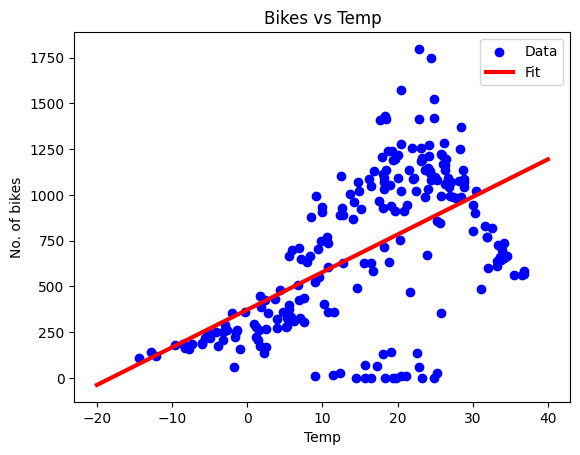

In [20]:
plt.scatter(X_train_temp, y_train_temp, label = 'Data', color = 'blue')
x = tf.linspace(-20, 40, 100)  # goes from -20 to 40, take 100 samples
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label = 'Fit', color = 'red', linewidth = 3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('No. of bikes')
plt.xlabel('Temp')
plt.show()

# Multiple Linear Regression

In [21]:
#df.head()

In [22]:
_, X_train_all, y_train_all = get_xy(train, 'bike-count', x_labels=df.columns[1:])  #all columns except bike-count 
_, X_valid_all, y_valid_all = get_xy(valid, 'bike-count', x_labels=df.columns[1:])   
_, X_test_all, y_test_all = get_xy(test, 'bike-count', x_labels=df.columns[1:])  

In [23]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [24]:
all_reg.score(X_test_all, y_test_all)  # 0.46 improved when compared with just temp

0.4764349309736827

In [25]:
y_pred_l = all_reg.predict(X_test_all)

# Regression with Neural Net

In [26]:
# Building the Model

# Normalizer layer
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))  # single vector 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)  # Adding only 1 node with no activation function means the model is linear

])

# using back propagation

In [28]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [29]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1,1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_valid_temp, y_valid_temp)
)

In [30]:
def plot_loss(history):
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))  # 1 row and 2 columns 
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.legend()
    plt.show()

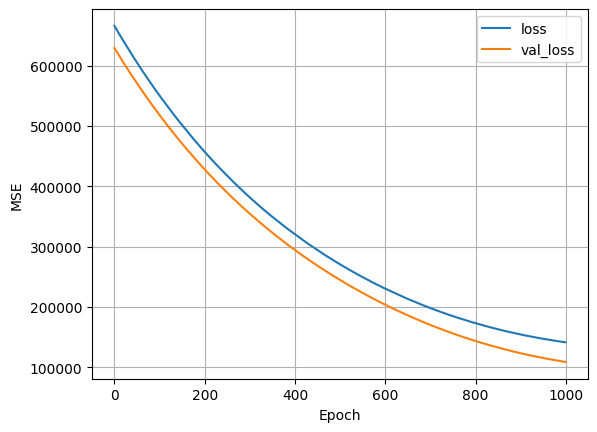

In [31]:
plot_loss(history)

#### We can see that the losses are converging

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


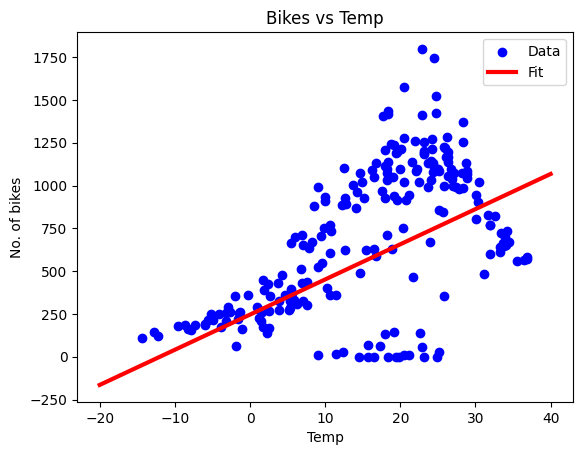

In [32]:
# Plotting Scatter plot for nn_model 

plt.scatter(X_train_temp, y_train_temp, label = 'Data', color = 'blue')
x = tf.linspace(-20, 40, 100)  # goes from -20 to 40, take 100 samples
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label = 'Fit', color = 'red', linewidth = 3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('No. of bikes')
plt.xlabel('Temp')
plt.show()

- here we're using back propagation
- older version of this scatter plot is only trying to compute the best fit line

- can repeat multiple regression -> exercise

# Neural Net with more layers

In [47]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='relu')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mean_squared_error')


In [48]:
history = nn_model.fit(
    X_train_temp, y_train_temp, 
    validation_data = (X_valid_temp, y_valid_temp),
    verbose = 0,
    epochs = 100
)

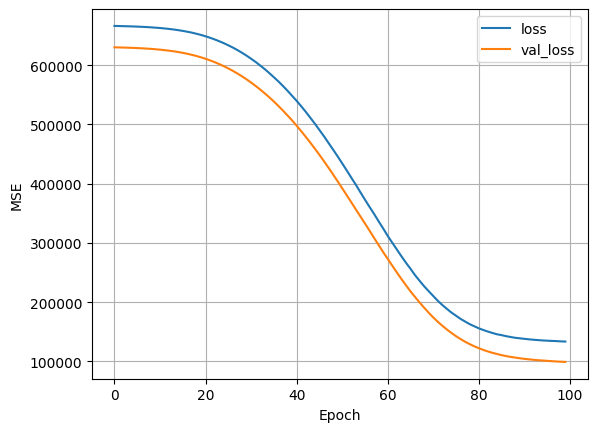

In [49]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


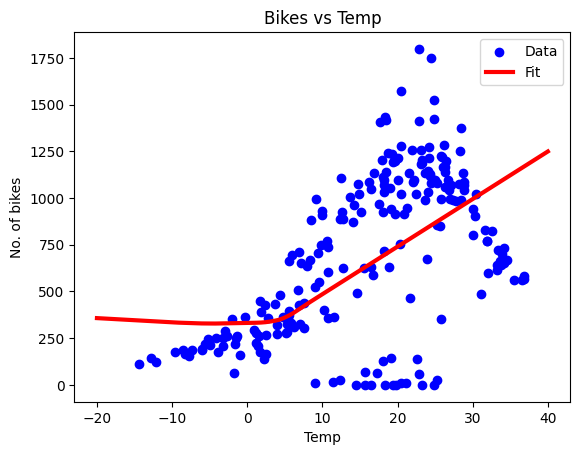

In [50]:
# Plotting Scatter plot for nn_model 

plt.scatter(X_train_temp, y_train_temp, label = 'Data', color = 'blue')
x = tf.linspace(-20, 40, 100)  # goes from -20 to 40, take 100 samples
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label = 'Fit', color = 'red', linewidth = 3)
plt.legend()
plt.title('Bikes vs Temp')
plt.ylabel('No. of bikes')
plt.xlabel('Temp')
plt.show()

In [51]:
# Repeat with mulitple inputs

# Normalizer layer
all_normalizer = tf.keras.layers.Normalization(input_shape = (6,), axis=-1)
all_normalizer.adapt(X_train_all)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:

# Build Model
nn_model_multiple = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='relu')
])


In [55]:

nn_model_multiple.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mean_squared_error')

In [56]:
history = nn_model_multiple.fit(
    X_train_all, y_train_all, 
    validation_data = (X_valid_all, y_valid_all),
    verbose = 0,
    epochs = 100
)

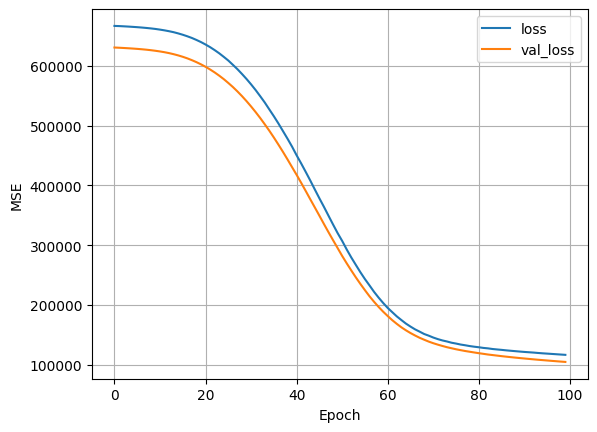

In [57]:
#Plotting history
plot_loss(history)

In [58]:
# Measure MSE for both linear regressor and neural net
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model_multiple.predict(X_test_all)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [59]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [60]:
MSE(y_pred_lr, y_test_all)

np.float64(113131.07710233999)

In [61]:
MSE(y_pred_nn, y_test_all)

np.float64(142346.61181969507)

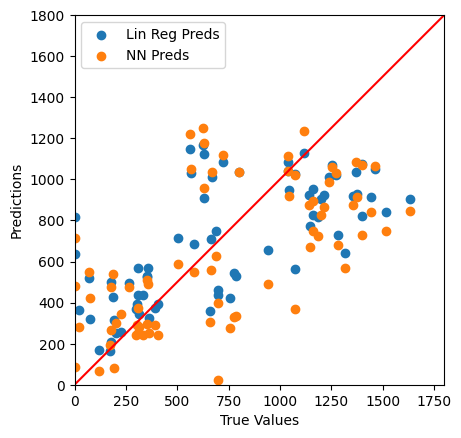

In [62]:
ax = plt.axes(aspect = 'equal')
plt.scatter(y_test_all, y_pred_lr, label = 'Lin Reg Preds')
plt.scatter(y_test_all, y_pred_nn, label = 'NN Preds ')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c = 'red')